In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('/content/train-balanced-sarcasm.csv')
df = df.dropna(subset=['comment', 'label'])

In [4]:
X = df['comment']
y = df['label']

In [5]:
sarcasm_percentage = (y.sum() / len(y)) * 100
print(f"Sarcasm Percentage in Dataset: {sarcasm_percentage:.2f}%")

Sarcasm Percentage in Dataset: 50.00%


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=20000, ngram_range=(1, 3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [8]:
log_reg = LogisticRegression(C=1.0, max_iter=2000, solver='lbfgs')
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=2000)

In [9]:
y_pred = log_reg.predict(X_test_tfidf)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.6789196408696297
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.73      0.69    101016
           1       0.70      0.63      0.66    101139

    accuracy                           0.68    202155
   macro avg       0.68      0.68      0.68    202155
weighted avg       0.68      0.68      0.68    202155



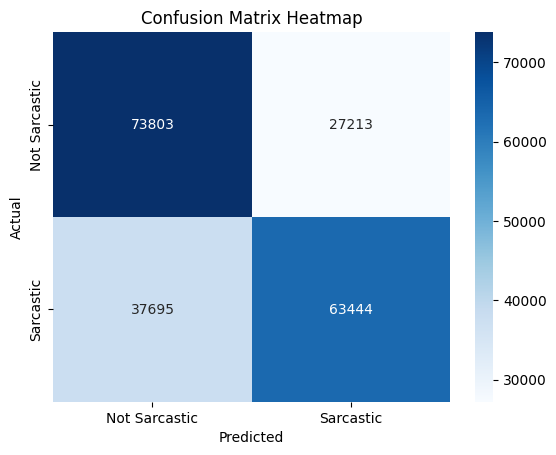

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [12]:
feature_names = np.array(vectorizer.get_feature_names_out())
coefs = log_reg.coef_.flatten()
top_positive_coefficients = np.argsort(coefs)[-10:]
top_negative_coefficients = np.argsort(coefs)[:10]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

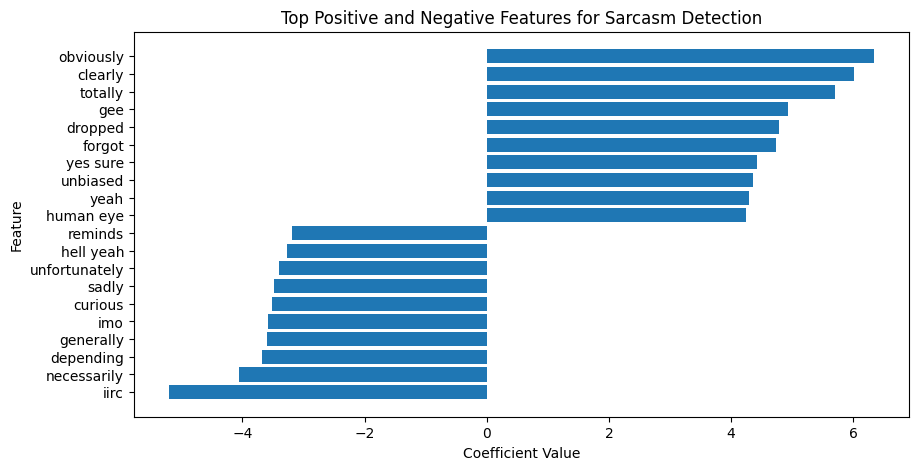

In [13]:
plt.figure(figsize=(10, 5))
plt.barh(range(20), coefs[top_coefficients], align='center')
plt.yticks(range(20), feature_names[top_coefficients])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Top Positive and Negative Features for Sarcasm Detection")
plt.show()

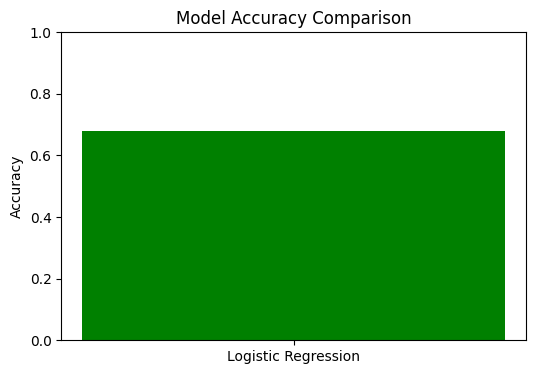

In [14]:
models = ['Logistic Regression']
accuracies = [accuracy]
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color='green')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()